In [ ]:
import folium

In [ ]:
m = folium.Map(location=(4, -72))
m

In [ ]:
map2 = folium.Map(location=[4.76, -74.1], tiles="cartodb positron", zoom_start=15)
map2

In [ ]:
map = folium.Map(location=[3.74590, -71.78598], zoom_start=11)
tile = folium.TileLayer(
      tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
      attr = 'Esri',
      ).add_to(map)
map

In [ ]:
m = folium.Map(location=(4, -72))
folium.Marker(
    location=[4, -72],
    tooltip="Titulo",
    popup="Texto",
    icon=folium.Icon(icon="cloud"),
).add_to(m)
m

In [ ]:
m = folium.Map(location=[4, -72], zoom_start=8)
trail = [
    (4.71, -72.15),
    (2.22, -71.16),
    (4.73, -73.18),
]
folium.PolyLine(trail).add_to(m)
m

In [35]:
from folium.plugins import HeatMap
from shapely.geometry import Point
import geopandas as gpd
movimientoMasa = gpd.read_file("/content/drive/MyDrive/De cero a Digital Twin en ingeniería civil/Capitulo 5/5.3 Caso de Estudio Movimientos en Masa en Colombia/Inventario_de_movimientos_en_masa.csv")
movimientoMasa

,X,Y,FID,OBJECTID,ID,INV_MOVIMI,F35DOV_TIP,TIPO,SUBTIPO_MO,SUBTIPO,CLAS_MAPA,ETIQUETA_M,ESRI_OID,geometry
0,-8430070.4274,258331.820599999,1,-7.58397098089e+56,1752,31553,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,130,None
1,-8442006.3505,251832.989500001,2,-7.58397098089e+56,1753,31534,67,Caida,20,Caida de detritos,Caida,cd,131,None
2,-8442964.935,256351.1963,3,-7.58397098089e+56,1754,31551,69,Deslizamiento,82,Deslizamiento traslacional planar,Deslizamiento,dtp,132,None
3,-8442624.7922,255639.4155,4,-7.58397098089e+56,1755,31540,67,Caida,15,Caida de roca,Caida,cr,133,None
4,-8442501.1039,255391.840399999,5,-7.58397098089e+56,1757,31538,67,Caida,15,Caida de roca,Caida,cr,134,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,-8087309.057,893729.7971,6822,-7.58397098089e+56,9752,33421,67,Caida,15,Caida de roca,Caida,cr,4706,None
6822,-8085279.0224,894243.1578,6823,-7.58397098089e+56,9753,33422,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4707,None
6823,-8105146.1501,882553.441599999,6824,-7.58397098089e+56,9754,33423,69,Deslizamiento,4,Deslizamiento traslacional,Deslizamiento,dt,4708,None
6824,-8086501.9907,882667.7018,6825,-7.58397098089e+56,9755,33424,69,Deslizamiento,3,Deslizamiento rotacional,Deslizamiento rotacional,dr,4709,None


In [36]:
movimientoMasa["TIPO"].unique()

array(['Deslizamiento', 'Caida', 'Reptación', 'Volcamiento', 'Flujo',
       'Deformaciones gravitacionales', 'Propagación lateral'],
      dtype=object)

In [ ]:
geometry = [Point(xy) for xy in zip(movimientoMasa['X'],movimientoMasa['Y'])]
movimientoMasa = gpd.GeoDataFrame(movimientoMasa,geometry =geometry)
movimientoMasa.crs

In [ ]:
movimientoMasa.crs = 'EPSG:3857'
movimientoMasa = movimientoMasa.to_crs("EPSG:4326")
movimientoMasa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
deslizamientos = movimientoMasa.query("TIPO == 'Deslizamiento'")
caida = movimientoMasa.query("TIPO == 'Caida'")
flujo = movimientoMasa.query("TIPO == 'Flujo'")

<Axes: >

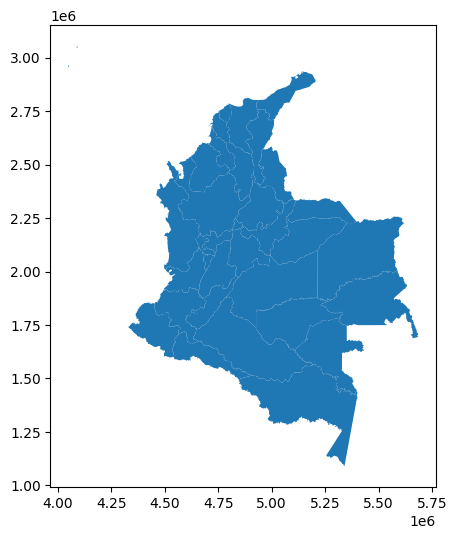

In [ ]:
departamentos = gpd.read_file("/content/drive/MyDrive/De cero a Digital Twin en ingeniería civil/Capitulo 5/5.3 Caso de Estudio Movimientos en Masa en Colombia/Departamentos.zip")
departamentos.plot(figsize=(6,6))

In [ ]:
departamentos_mundial = departamentos.to_crs("EPSG:4326")
departamentos_mundial.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

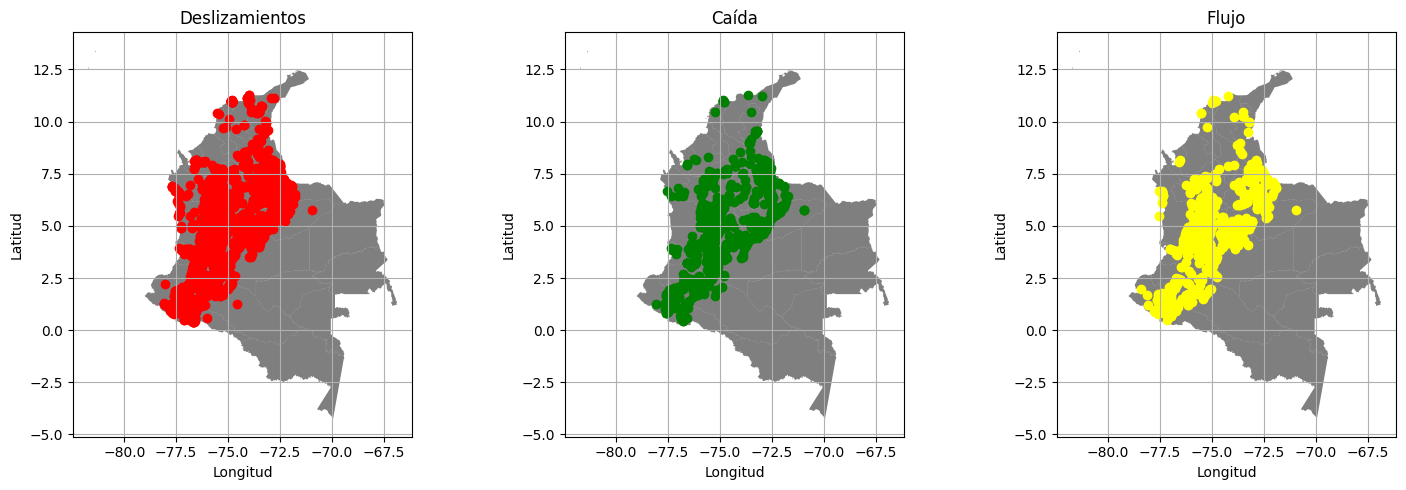

In [37]:
import matplotlib.pyplot as plt

# Crear la figura con 3 subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Parte izquierda - Deslizamientos
departamentos_mundial.plot(ax=ax1, alpha=0.5, color="black")
deslizamientos.plot(ax=ax1, color="red")
ax1.set_title("Deslizamientos")
ax1.set_xlabel("Longitud")
ax1.set_ylabel("Latitud")
ax1.grid(True)

# Parte central - Caída
departamentos_mundial.plot(ax=ax2, alpha=0.5, color="black")
caida.plot(ax=ax2, color="green")
ax2.set_title("Caída")
ax2.set_xlabel("Longitud")
ax2.set_ylabel("Latitud")
ax2.grid(True)

# Parte derecha - Flujo
departamentos_mundial.plot(ax=ax3, alpha=0.5, color="black")
flujo.plot(ax=ax3, color="yellow")
ax3.set_title("Flujo")
ax3.set_xlabel("Longitud")
ax3.set_ylabel("Latitud")
ax3.grid(True)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

In [40]:
coordinates = [(point.y, point.x) for point in deslizamientos['geometry']]
m = folium.Map([4,-72], zoom_start=6)
HeatMap(coordinates).add_to(m)
m

In [41]:
coordinates = [(point.y, point.x) for point in caida['geometry']]
m = folium.Map([4,-72], zoom_start=6)
HeatMap(coordinates).add_to(m)
m

In [42]:
coordinates = [(point.y, point.x) for point in flujo['geometry']]
m = folium.Map([4,-72], zoom_start=6)
HeatMap(coordinates).add_to(m)
m